# MALIS 19.3 WPM_T9.2 Frage 4
## Datenanalyse der offenen Daten der Seattle Library


Die URL definiert in welcher Größe die Datenmengen abgerufen werden. So kann man die URL auf Zeilen (standartmäßig 1000) oder auf Jahre begrenzen. Für die Fragen wurde ist ein Limit von 3.000.000 Zeilen genommen, damit sind alle Checkouts des Jahres 2018 enthalten. 

# Frage 4 "Welcher Monat 2018 hatte die höchste absolute Anzahl an Ausleihen, beziehungsweise Checkouts?"

Hierfür wird zunächst pandas nach Anleitung heruntergeladen, ebenfalls wird erneut Matplotlib Pyplot geladen. Dann werden die Daten importiert. Es wird wieder mit der Pivot-Tabelle gearbeitet und die gesuchten Spalten mit den entsorechenden Werte werden so angezeigt.

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=3000000"
ceins = "Checkoutsall.csv"

In [4]:
# Download der Daten
# urllib.request.urlretrieve(url, ceins)

In [5]:
checkout = pd.read_csv(ceins)

In [6]:
# Anzeigen der Tabelle zur Kontrolle 
checkout

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,"Naruto. Vol. 65, Hashirama and Madara / story ...","Kishimoto, Masashi, 1974-",Naruto Fictitious character Comic books strips...,"VIZ Media,",[2014]
1,Physical,Horizon,BOOK,2018,12,2,Oishisō na shirokuma / Shibata Keiko.,"Shibata, Keiko.","Polar bear Juvenile fiction, Food Juvenile fic...","Pīeichipīkenkyūjo,",2017.
2,Physical,Horizon,VIDEODISC,2018,12,7,Like crazy / Paramount Vantage ; Indian Paintb...,NaN,"First loves Drama, College students Drama, Fea...","Paramount Home Entertainment,",[2012]
3,Digital,OverDrive,AUDIOBOOK,2018,12,3,Catch a Falling Heiress: American Heiress In L...,Laura Lee Guhrke,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2016
4,Physical,Horizon,BOOK,2018,12,1,Literally show me a healthy person / Darcie Wi...,"Wilder, Darcie","Young women Fiction, Grief Fiction","Tyrant Books,",[2017]
...,...,...,...,...,...,...,...,...,...,...,...
2665093,Digital,Hoopla,MUSIC,2018,1,1,The Snow Queen,NaN,Pop,LIGHTYEAR,NaN
2665094,Physical,Horizon,BOOK,2018,1,4,There was an old lady who swallowed a fly / il...,NaN,"Nonsense verses Juvenile literature, Folk song...","Child's Play,",2002.
2665095,Physical,Horizon,BOOK,2018,1,2,The book of night women / Marlon James.,"James, Marlon, 1970-","Slaves Fiction, Jamaica Fiction, Historical fi...","Riverhead Books,",2010.
2665096,Physical,Horizon,BOOK,2018,1,1,Hunting Eve / Iris Johansen.,"Johansen, Iris","Duncan Eve Fictitious character Fiction, Track...","St. Martin's Press,",2013.


In [7]:
# Definition von checkoutsall, Bildung des Wertes mit Hilfe der Pivot-Tabelle
checkoutsall = checkout.pivot_table(index = "checkoutmonth", values = "checkouts", aggfunc="sum")

In [8]:
checkoutsall

,checkouts
checkoutmonth,
1,824500
2,726732
3,800357
4,762282
5,728675
6,754591
7,782721
8,798178
9,730100


In [9]:
# Filtern nach maximalen Ausleihwert. Loesung: Am meisten checkouts gab es im Januar mit 824.500
checkoutsall.max()

checkouts    824500
dtype: int64

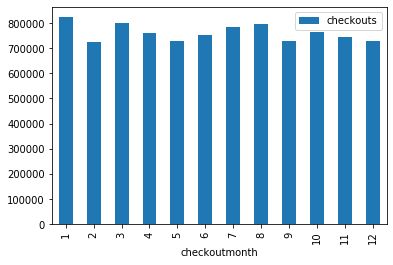

In [19]:
# graühische Darstellung der Ausleihen pro Monat
checkoutsall.plot(kind = "bar")